In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(123)
raw_data_path=os.path.join('data','raw')
df=pd.read_csv(os.path.join(raw_data_path,'fer2013.csv'))
X=[]
for i in range(len(df)):
    X.append(df.loc[i,'pixels'].split(' '))
X=np.array(X,np.float32)/255.
y=df.emotion.values
X_train=X[np.where(df.Usage=='Training')]
y_train=y[np.where((df.Usage=='Training'))]
X_test=X[np.where((df.Usage!='Training'))]
y_test=y[np.where((df.Usage!='Training'))]
def balance_classes(X,y):
    X1=X[np.where(y!=1)]
    X2=X[np.where(y==1)]
    X2=np.repeat(X2,9,axis=0)
    X=np.concatenate((X1,X2),axis=0)
    y1=y[np.where(y!=1)]
    y2=y[np.where(y==1)]
    y2=np.repeat(y2,9,axis=0)
    y=np.concatenate((y1,y2),axis=0)
    i=[i for i in range(len(y))]
    np.random.shuffle(i)
    return X[i],y[i]
X_train,y_train=balance_classes(X_train,y_train)
def one_hot_encoder(X):
    N=len(X)
    K=len(set(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
y_train=one_hot_encoder(y_train)

In [31]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        W=W-lr*(X_t.T.dot(dy))
        b=b-lr*(dy).sum(axis=0)
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 5.357790485155568 , Classification: 0.16944473202885046 , Test Cost 5.185511456996907 , Classification : 0.17080745341614906
Epoch 100 Train Cost: 1.516110240850131 , Classification: 0.1552955792525106 , Test Cost 1.4831417679993444 , Classification : 0.15807453416149067
Epoch 200 Train Cost: 1.313367439555524 , Classification: 0.16050660868965042 , Test Cost 1.2819792590620742 , Classification : 0.16304347826086957
Epoch 300 Train Cost: 1.1986990110219855 , Classification: 0.16285329744279947 , Test Cost 1.1689278253713367 , Classification : 0.16645962732919253
Epoch 400 Train Cost: 1.1193528609453565 , Classification: 0.16985885357352382 , Test Cost 1.0910666677137573 , Classification : 0.1720496894409938
Epoch 500 Train Cost: 1.0589059926352098 , Classification: 0.17431066017876246 , Test Cost 1.0321983516161548 , Classification : 0.17453416149068324
Epoch 600 Train Cost: 1.0106747414592043 , Classification: 0.1796252200020706 , Test Cost 0.9854759645301648 , Cla

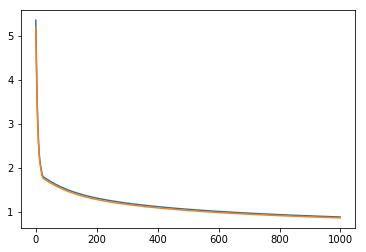

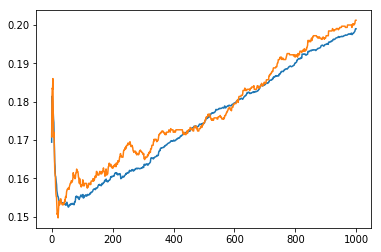

Wall time: 11min 54s


In [35]:
%%time
fit(X_train,y_train,0.000001,1000)

## Stochastic GD

In [38]:
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    for i in range(epoch):
        for n in range(len(X_t)):
            x=X_t[n,:].reshape(1,D)
            Y=y_t[n,:].reshape(1,K)
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            W=W-lr*(x.T.dot(dy))
            b=b-lr*(dy).sum(axis=0)
            c_t.append(cost(Y,y_p_t))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            c_v.append(cost(y_v,y_p_v))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 1==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()

Epoch 0 Train Cost: 9.243904927980362 , Classification: 0.0 , Test Cost 5.591397213452602 , Classification : 0.13478260869565217
Epoch 1 Train Cost: 5.900682307624433 , Classification: 0.0 , Test Cost 5.591318841520262 , Classification : 0.13478260869565217
Epoch 2 Train Cost: 5.125928435959709 , Classification: 0.0 , Test Cost 5.591232407762455 , Classification : 0.13478260869565217
Epoch 3 Train Cost: 3.2351898937613695e-13 , Classification: 1.0 , Test Cost 5.591159666728351 , Classification : 0.13478260869565217
Epoch 4 Train Cost: 9.910877931178746 , Classification: 0.0 , Test Cost 5.591159666728351 , Classification : 0.13478260869565217
Epoch 5 Train Cost: -0.0 , Classification: 1.0 , Test Cost 5.591084422736686 , Classification : 0.13478260869565217
Epoch 6 Train Cost: 4.855636269093153 , Classification: 0.0 , Test Cost 5.591084422736686 , Classification : 0.13478260869565217
Epoch 7 Train Cost: 5.956912064743465 , Classification: 0.0 , Test Cost 5.591043650702322 , Classificatio

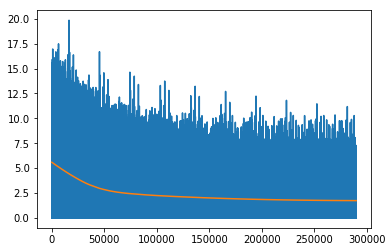

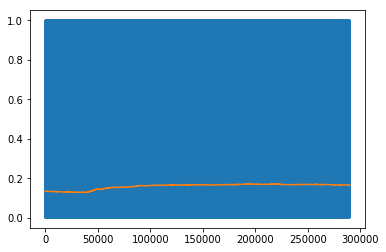

Wall time: 3h 26min 21s


In [39]:
%%time
fit(X_train,y_train,0.000001,10)

In [18]:
int(0.9*X_train.shape[0])

28977

## Batch GD

In [10]:
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    n_batch=10
    bsize=2900
    X_t.shape[0]
    for i in range(epoch):
        for n in range(n_batch):
            x=X_t[(n*bsize):(n*bsize+bsize),:]
            Y=y_t[(n*bsize):(n*bsize+bsize),:]
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            W=W-lr*(x.T.dot(dy))
            b=b-lr*(dy).sum(axis=0)
            c_t.append(cost(Y,y_p_t))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            c_v.append(cost(y_v,y_p_v))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()

Epoch 0 Train Cost: 0.3153517108738911 , Classification: 0.2093103448275862 , Test Cost 0.3152820644035548 , Classification : 0.21211180124223603
Epoch 100 Train Cost: 0.2736209943309542 , Classification: 0.2286206896551724 , Test Cost 0.2735624032383215 , Classification : 0.22142857142857142
Epoch 200 Train Cost: 0.2711675047381362 , Classification: 0.23517241379310344 , Test Cost 0.27123579153309946 , Classification : 0.23198757763975156
Epoch 300 Train Cost: 0.2692655920080228 , Classification: 0.24275862068965517 , Test Cost 0.26941049433231684 , Classification : 0.23881987577639752
Epoch 400 Train Cost: 0.2676800624331803 , Classification: 0.2513793103448276 , Test Cost 0.26787610909694587 , Classification : 0.24440993788819876
Epoch 500 Train Cost: 0.2663079811243189 , Classification: 0.25724137931034485 , Test Cost 0.26654164526741 , Classification : 0.25248447204968943
Epoch 600 Train Cost: 0.2650952211149941 , Classification: 0.25862068965517243 , Test Cost 0.26535895786753094

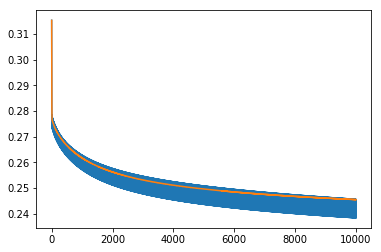

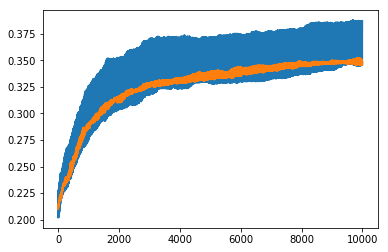

Wall time: 16min 58s


In [11]:
%%time
fit(X_train,y_train,0.000001,1000)

## Full GD with Momentum

### Regular Momentum : 

In [12]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,mu,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    vW=0
    vb=0
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        vW=mu*vW-lr*gW
        vb=mu*vb-lr*gb
        W=W + vW
        b=b + vb
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 4.956416656795732 , Classification: 0.11623011353832349 , Test Cost 4.9650571083599955 , Classification : 0.1170807453416149
Epoch 100 Train Cost: 0.9548955138329609 , Classification: 0.19346378161990543 , Test Cost 0.9430963703416961 , Classification : 0.19782608695652174
Epoch 200 Train Cost: 0.7726816186628243 , Classification: 0.21320357524933567 , Test Cost 0.770877884492904 , Classification : 0.21521739130434783
Epoch 300 Train Cost: 0.6810514245055059 , Classification: 0.22821548124374505 , Test Cost 0.683946661298418 , Classification : 0.23074534161490684
Epoch 400 Train Cost: 0.6223538291296098 , Classification: 0.2383614590882424 , Test Cost 0.6291839975652633 , Classification : 0.24037267080745342
Epoch 500 Train Cost: 0.5802396742354059 , Classification: 0.24595368740725404 , Test Cost 0.5903016493522324 , Classification : 0.2496894409937888
Epoch 600 Train Cost: 0.5479599153075221 , Classification: 0.2510266763295027 , Test Cost 0.5604679099173968 , Cla

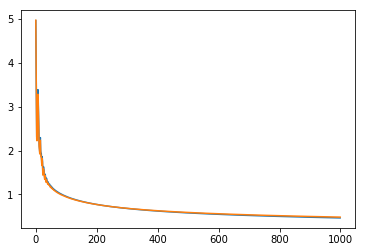

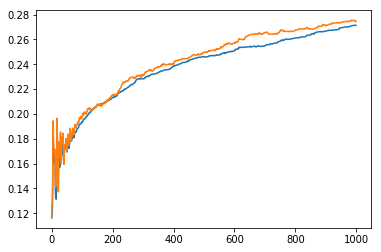

Wall time: 13min 13s


In [3]:
%%time
fit(X_train,y_train,0.9,0.000001,1000)

### Nesterov Momentum

In [4]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,mu,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    vW=0
    vb=0
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        vW=mu*vW-lr*gW
        vb=mu*vb-lr*gb
        W=W + mu*vW -lr*gW
        b=b + mu*vb -lr*gb
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 2.4815514010943427 , Classification: 0.18756254960831004 , Test Cost 2.5258712838191175 , Classification : 0.17515527950310558
Epoch 100 Train Cost: 0.893421760403561 , Classification: 0.18704489767746835 , Test Cost 0.9190539339017159 , Classification : 0.18354037267080744
Epoch 200 Train Cost: 0.748405788584184 , Classification: 0.20923491044621598 , Test Cost 0.7715465307128062 , Classification : 0.20838509316770187
Epoch 300 Train Cost: 0.6720245829229547 , Classification: 0.22103737446940677 , Test Cost 0.697328955796704 , Classification : 0.21521739130434783
Epoch 400 Train Cost: 0.619878551184877 , Classification: 0.23045863961072574 , Test Cost 0.6478452391279076 , Classification : 0.2217391304347826
Epoch 500 Train Cost: 0.6047584714480411 , Classification: 0.21972598957794112 , Test Cost 0.6379012040180138 , Classification : 0.21024844720496894
Epoch 600 Train Cost: 0.5765709942553382 , Classification: 0.2282845015011906 , Test Cost 0.6113818443502262 , Cl

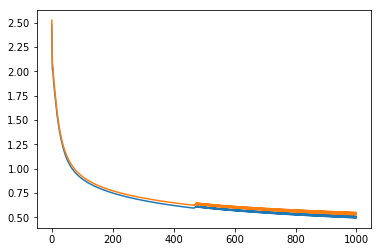

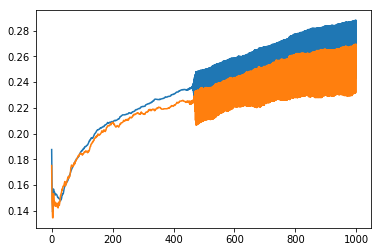

Wall time: 13min


In [5]:
%%time
fit(X_train,y_train,0.9,0.000001,1000)

## Momentum with Batch GD

### Regular Momentum

In [50]:
def fit(X,y,mu,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    n_batch=10
    bsize=2900
    vW=0
    vb=0
    X_t.shape[0]
    for i in range(epoch):
        for n in range(n_batch):
            x=X_t[(n*bsize):(n*bsize+bsize),:]
            Y=y_t[(n*bsize):(n*bsize+bsize),:]
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            gW=(x.T.dot(dy))
            gb=(dy).sum(axis=0)
            vW=mu*vW - lr*gW
            vb=mu*vb - lr*gb
            W=W+ vW
            b=b+ vb
            c_t.append(cost(Y,y_p_t))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            c_v.append(cost(y_v,y_p_v))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()

Epoch 0 Train Cost: 0.33633706777050293 , Classification: 0.2293103448275862 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 100 Train Cost: 0.26489500769467045 , Classification: 0.2710344827586207 , Test Cost 0.26562322362760427 , Classification : 0.2645962732919255
Epoch 200 Train Cost: 0.2591883181953321 , Classification: 0.29 , Test Cost 0.26003054537674203 , Classification : 0.2984472049689441
Epoch 300 Train Cost: 0.255861195763203 , Classification: 0.30896551724137933 , Test Cost 0.2569513627180289 , Classification : 0.31863354037267083
Epoch 400 Train Cost: 0.2535192527157292 , Classification: 0.31655172413793103 , Test Cost 0.25484446458653426 , Classification : 0.3248447204968944
Epoch 500 Train Cost: 0.2517035092571428 , Classification: 0.32517241379310347 , Test Cost 0.2532359391219805 , Classification : 0.32919254658385094
Epoch 600 Train Cost: 0.2502128316361957 , Classification: 0.33 , Test Cost 0.25192980474846816 , Classification : 0.33043478

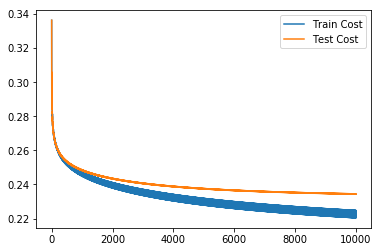

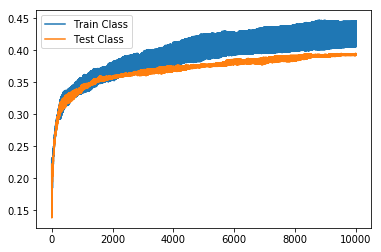

Wall time: 19min 51s


In [52]:
%%time
fit(X_train,y_train,0.9,0.000001,1000)

## Variable Learning Rates
### AdaGrad

In [53]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    cacheW=0
    cacheb=0
    epsilon=10e-9
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        cacheW+=gW**2
        cacheb+=gb**2
        W=W-lr*(gW/np.sqrt(cacheW+epsilon))
        b=b-lr*(gb/np.sqrt(cacheb+epsilon))
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 0.3366478789410983 , Classification: 0.22393622528212032 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 100 Train Cost: 0.28001021836166573 , Classification: 0.20964903199088933 , Test Cost 0.2796397632463163 , Classification : 0.2080745341614907
Epoch 200 Train Cost: 0.27851774812239977 , Classification: 0.21064982572384994 , Test Cost 0.2781528267266695 , Classification : 0.2062111801242236
Epoch 300 Train Cost: 0.27757219822774426 , Classification: 0.21234082203126617 , Test Cost 0.27721153402345283 , Classification : 0.20838509316770187
Epoch 400 Train Cost: 0.2768020147289788 , Classification: 0.21416985885357354 , Test Cost 0.2764513661006106 , Classification : 0.20869565217391303
Epoch 500 Train Cost: 0.2761435181797869 , Classification: 0.2157573247748214 , Test Cost 0.2758058165948849 , Classification : 0.21211180124223603
Epoch 600 Train Cost: 0.27556447977446774 , Classification: 0.21779342236946544 , Test Cost 0.27524094188388

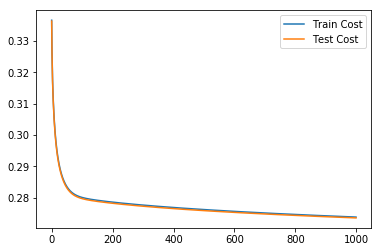

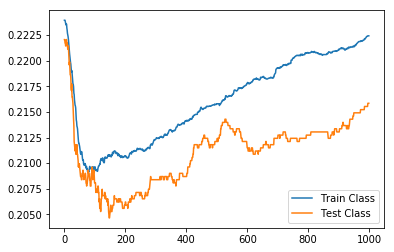

Wall time: 11min 53s


In [54]:
%%time
fit(X_train,y_train,0.0001,1000)

### RMSProp

In [55]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    decay=0.99
    cacheW=0
    cacheb=0
    epsilon=10e-9
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        cacheW=decay*cacheW+(1-decay)*(gW**2)
        cacheb=decay*cacheb+(1-decay)*(gb**2)
        W=W-lr*(gW/np.sqrt(cacheW+epsilon))
        b=b-lr*(gb/np.sqrt(cacheb+epsilon))
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 0.3366478789410983 , Classification: 0.22393622528212032 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 100 Train Cost: 0.27021846255813253 , Classification: 0.24039755668288643 , Test Cost 0.2699736988592006 , Classification : 0.23229813664596274
Epoch 200 Train Cost: 0.2647330026949136 , Classification: 0.2718707940780619 , Test Cost 0.26488791883623913 , Classification : 0.268944099378882
Epoch 300 Train Cost: 0.2612110892676619 , Classification: 0.2894019394692342 , Test Cost 0.2617052022749412 , Classification : 0.2875776397515528
Epoch 400 Train Cost: 0.25855112565996313 , Classification: 0.30203264658177176 , Test Cost 0.25935906901043637 , Classification : 0.3031055900621118
Epoch 500 Train Cost: 0.25646177338011755 , Classification: 0.31069468889118956 , Test Cost 0.25755778609773444 , Classification : 0.3111801242236025
Epoch 600 Train Cost: 0.2547986969555151 , Classification: 0.3154570866549332 , Test Cost 0.2558732580255901 ,

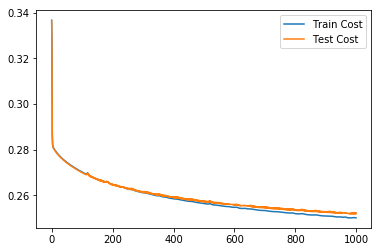

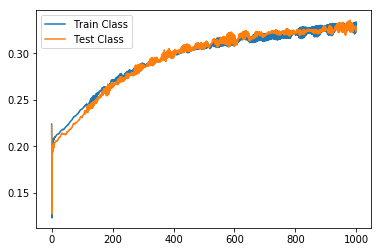

Wall time: 11min 32s


In [56]:
%%time
fit(X_train,y_train,0.0001,1000)

### Exponential

In [57]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    decay=0.99
    cacheW=0
    cacheb=0
    epsilon=10e-9
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        lr=lr*np.exp(-2*i)
        W=W-lr*gW
        b=b-lr*gb
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 100==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 0.3366478789410983 , Classification: 0.22393622528212032 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 100 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification : 0.1496894409937888
Epoch 200 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification : 0.1496894409937888
Epoch 300 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification : 0.1496894409937888
Epoch 400 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification : 0.1496894409937888
Epoch 500 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification : 0.1496894409937888
Epoch 600 Train Cost: 2.956806496560897 , Classification: 0.14970493839942023 , Test Cost 2.935138200120955 , Classification

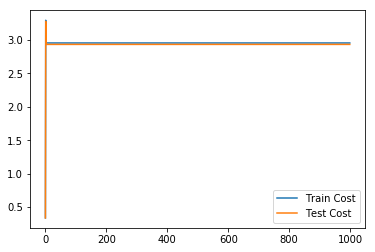

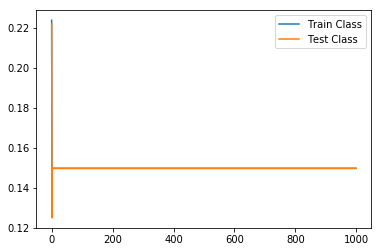

Wall time: 11min 26s


In [58]:
%%time
fit(X_train,y_train,0.00001,1000)

### Adam with Full GD

In [59]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    B1=0.99
    B2=0.9999
    vW=0
    vb=0
    mW=0
    mb=0
    epsilon=10e-9
    for i in range(epoch):
        y_p_t=forward(X_t,W,b)
        y_p_v=forward(X_v,W,b)
        dy=y_p_t-y_t
        gW=(X_t.T.dot(dy))
        gb=(dy).sum(axis=0)
        vW=(B2*vW+(1-B2)*(gW**2))/(1-B2**(i+1))
        vb=(B2*vb+(1-B2)*(gb**2))/(1-B2**(i+1))
        mW=(B1*mW+(1-B1)*gW)/(1-B1**(i+1))
        mb=(B1*mb+(1-B1)*gb)/(1-B1**(i+1))
        W=W-lr*(mW/np.sqrt(vW+1e-10))
        b=b-lr*(mb/np.sqrt(vb+1e-10))
        c_t.append(cost(y_t,y_p_t))
        c_v.append(cost(y_v,y_p_v))
        cl_t.append(score(y_t.argmax(axis=1),y_p_t.argmax(axis=1)))
        cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 10==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 0.3366478789410983 , Classification: 0.22393622528212032 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 10 Train Cost: 0.3164550441613322 , Classification: 0.22421230631190253 , Test Cost 0.3154010680305352 , Classification : 0.22142857142857142
Epoch 20 Train Cost: 0.3164535145777848 , Classification: 0.22421230631190253 , Test Cost 0.31539945545827003 , Classification : 0.22142857142857142
Epoch 30 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 40 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 50 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 60 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Cl

C:\Users\ytnvj\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in true_divide
C:\Users\ytnvj\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in true_divide


Epoch 140 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 150 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 160 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 170 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 180 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 190 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557373 , Classification : 0.22142857142857142
Epoch 200 Train Cost: 0.3164535145753824 , Classification: 0.22421230631190253 , Test Cost 0.3153994554557

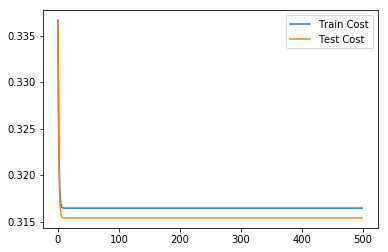

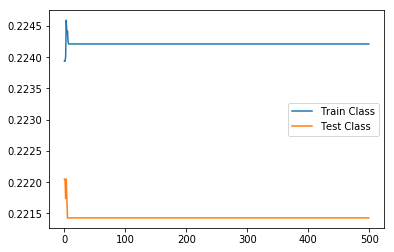

Wall time: 5min 48s


In [60]:
%%time
fit(X_train,y_train,0.0001,500)

#### Adam with Batch GD

In [61]:
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def softmax(a):
    return np.exp(a)/(np.exp(a).sum(axis=1,keepdims=True))
def cost(y,y_p):
    return -(y*np.log(y_p)).mean()
def fit(X,y,lr,epoch,fig=True):
    N,D=X.shape
    K=y.shape[1]
    np.random.seed(123)
    W=np.random.randn(D,K)/np.sqrt(D)
    b=np.random.randn(K)
    tr_i=np.random.choice(N,int(N*0.9),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_t=X[tr_i]
    y_t=y[tr_i]
    X_v=X[t_i]
    y_v=y[t_i]
    c_t=[]
    c_v=[]
    cl_t=[]
    cl_v=[]
    decay=0.99
    cacheW=0
    cacheb=0
    epsilon=10e-9
    n_batch=10
    bsize=2900
    for i in range(epoch):
        for n in range(n_batch):
            x=X_t[(n*bsize):(n*bsize+bsize),:]
            Y=y_t[(n*bsize):(n*bsize+bsize),:]
            y_p_t=forward(x,W,b)
            y_p_v=forward(X_v,W,b)
            dy=y_p_t-Y
            gW=(x.T.dot(dy))
            gb=(dy).sum(axis=0)
            cacheW=decay*cacheW+(1-decay)*(gW**2)
            cacheb=decay*cacheb+(1-decay)*(gb**2)
            W=W-lr*(gW/np.sqrt(cacheW+epsilon))
            b=b-lr*(gb/np.sqrt(cacheb+epsilon))
            c_t.append(cost(Y,y_p_t))
            c_v.append(cost(y_v,y_p_v))
            cl_t.append(score(Y.argmax(axis=1),y_p_t.argmax(axis=1)))
            cl_v.append(score(y_v.argmax(axis=1),y_p_v.argmax(axis=1)))
        if i % 10==0:
            print('Epoch {0} Train Cost: {1} , Classification: {2} , Test Cost {3} , Classification : {4}'.format(i,c_t[i],
                                                                                                                  cl_t[i],
                                                                                                                  c_v[i],
                                                                                                                  cl_v[i]))
    if fig==True:
        plt.plot(c_t,label='Train Cost')
        plt.plot(c_v,label='Test Cost')
        plt.legend()
        plt.show()
        plt.plot(cl_t,label='Train Class')
        plt.plot(cl_v,label='Test Class')
        plt.legend()
        plt.show()
def score(y,y_p):
    return np.mean(y==y_p)

Epoch 0 Train Cost: 0.33633706777050293 , Classification: 0.2293103448275862 , Test Cost 0.3363609902130988 , Classification : 0.2220496894409938
Epoch 10 Train Cost: 0.2787910579570425 , Classification: 0.21 , Test Cost 0.27926866305900067 , Classification : 0.20559006211180125
Epoch 20 Train Cost: 0.27703725445207794 , Classification: 0.21344827586206896 , Test Cost 0.27760358701019466 , Classification : 0.2059006211180124
Epoch 30 Train Cost: 0.27567647700746 , Classification: 0.21862068965517242 , Test Cost 0.27627998095221307 , Classification : 0.21024844720496894
Epoch 40 Train Cost: 0.27455929947443636 , Classification: 0.22137931034482758 , Test Cost 0.27516841024896194 , Classification : 0.21304347826086956
Epoch 50 Train Cost: 0.27360165534147474 , Classification: 0.22758620689655173 , Test Cost 0.27420031407631923 , Classification : 0.21459627329192546
Epoch 60 Train Cost: 0.2727563165792993 , Classification: 0.2303448275862069 , Test Cost 0.2733358257917119 , Classification

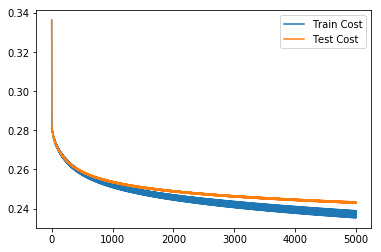

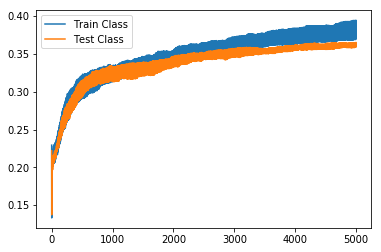

Wall time: 9min 40s


In [62]:
%%time
fit(X_train,y_train,0.0001,500)